In [1]:
import pandas as pd
import zipfile
import numpy as np
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zf = zipfile.ZipFile('/content/drive/MyDrive/House_Sale/House_Sale.zip')  #aloca o arquivo zip

data = pd.read_csv(zf.open('kc_house_data.csv')) # abre o arquivo CSV 'train.csv' presente dentro do ZIP
new_data = data

In [4]:
data = data.drop(['id', 'date', 'lat', 'long'], axis=1) # remove a coluna de IDs
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,1800,7503


In [5]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       2
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
np.where(data['sqft_above'].isnull().values==True)

(array([10, 17]),)

In [7]:
data = data.drop([10, 17])
new_data = new_data.drop([10, 17])

In [8]:
data = data.values[:,:]
data2 = data

In [9]:
np.random.seed(42)
np.random.shuffle(data)

In [10]:
random.seed(42)
while data.shape[0]%5 != 0:
  data = np.delete(data, random.randint(0, data.shape[0]), 0)

In [11]:
train = data[:,1:17]
label_train = data[:,0]

In [12]:
train = np.split(train, 5)
label_train = np.split(label_train, 5)

FOLD 1:
MAPE:  0.2917371680972327


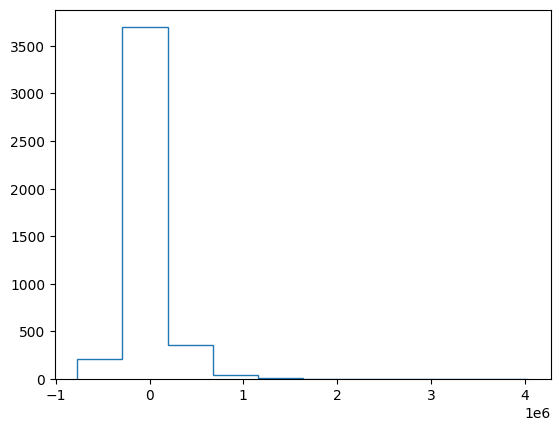

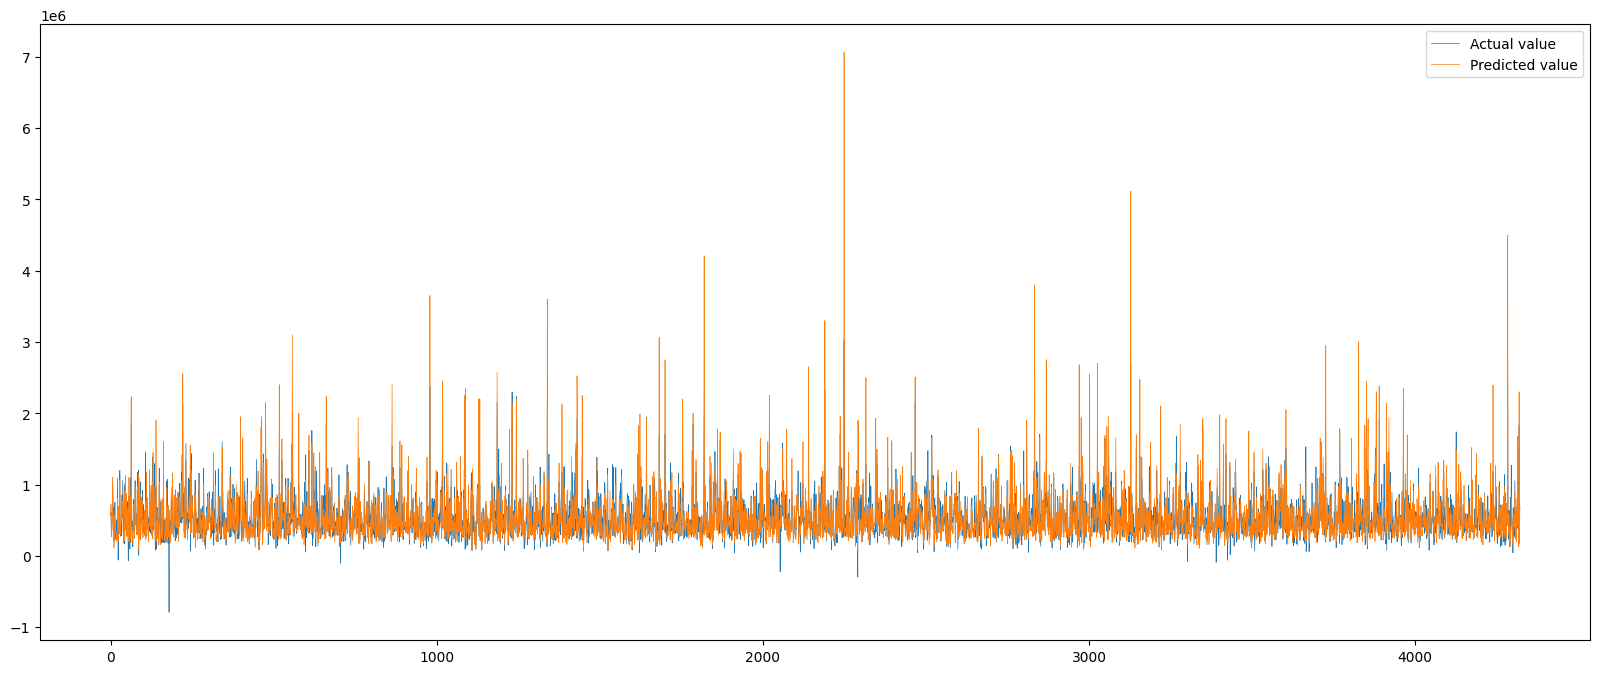

FOLD 2:
MAPE:  0.29027025570090087


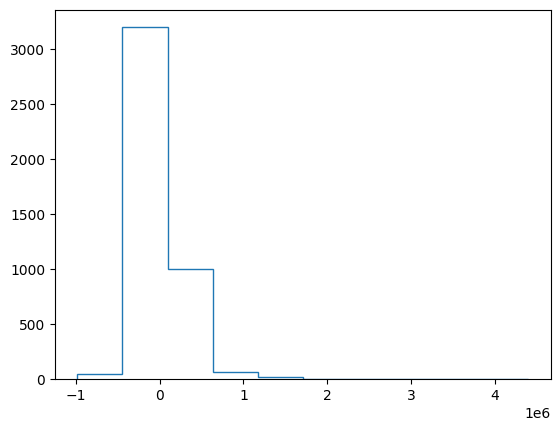

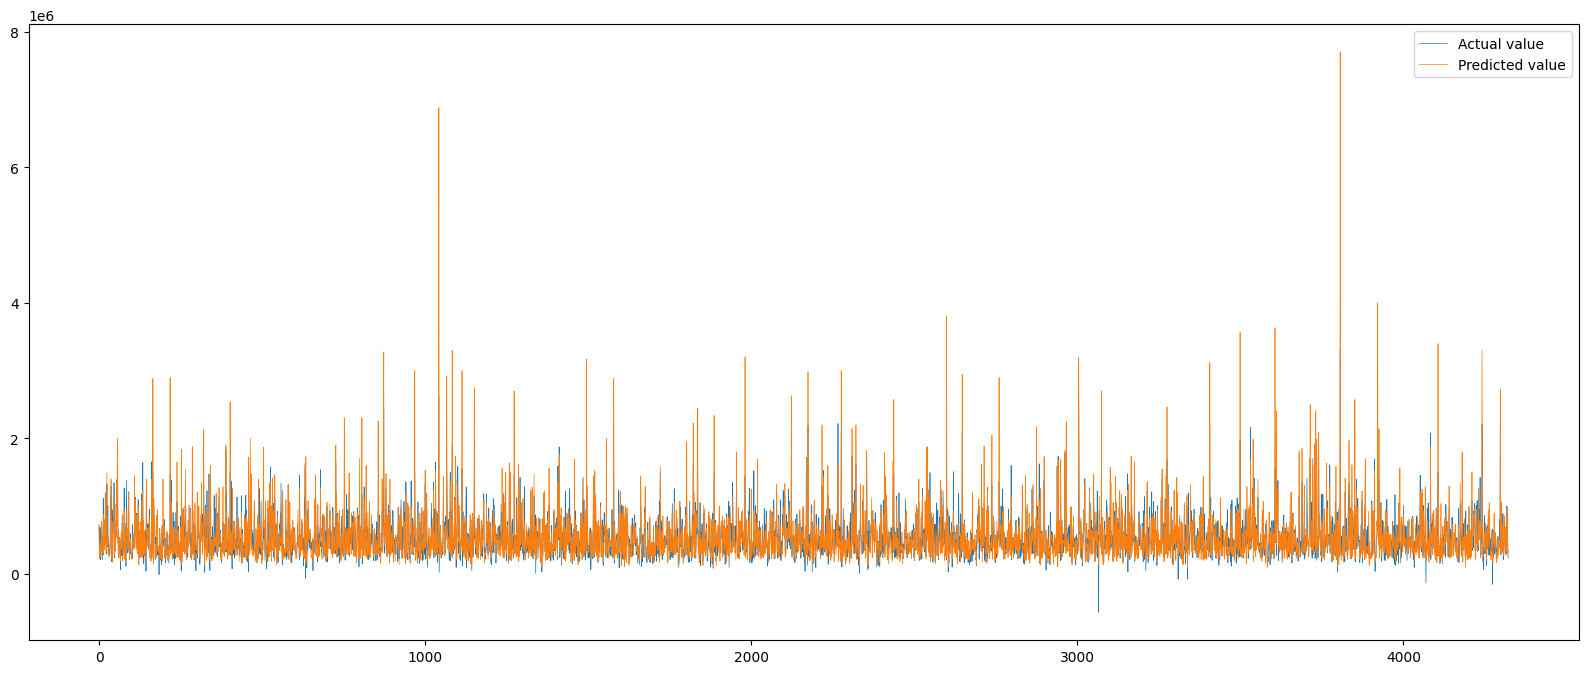

FOLD 3:
MAPE:  0.28933978997364757


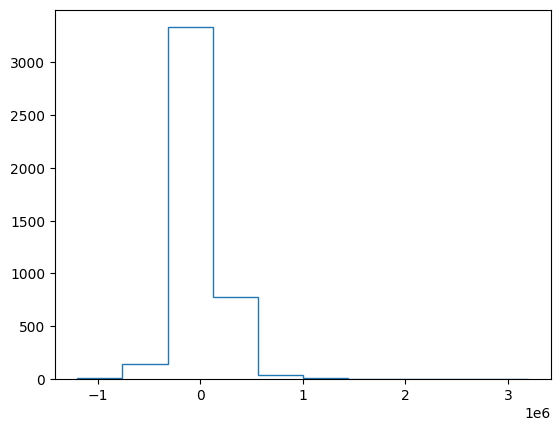

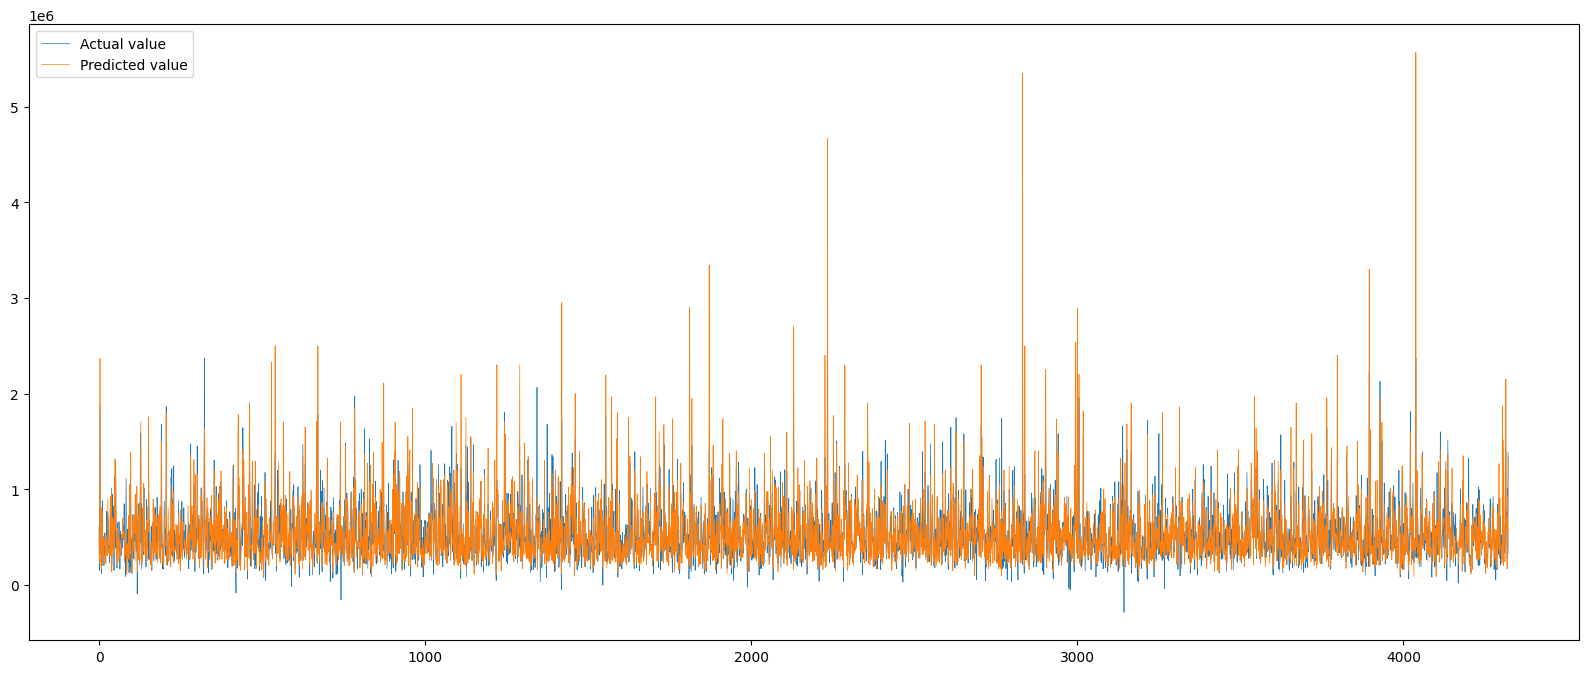

FOLD 4:
MAPE:  0.2901466929747808


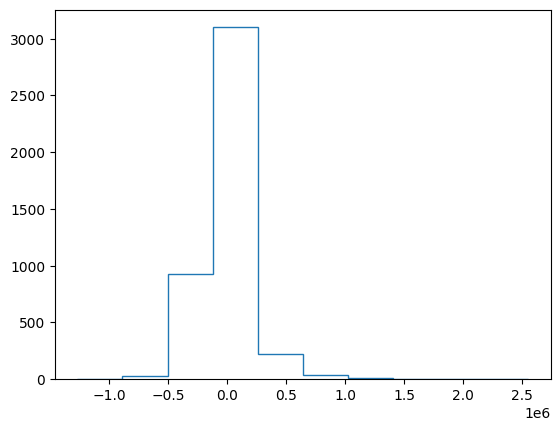

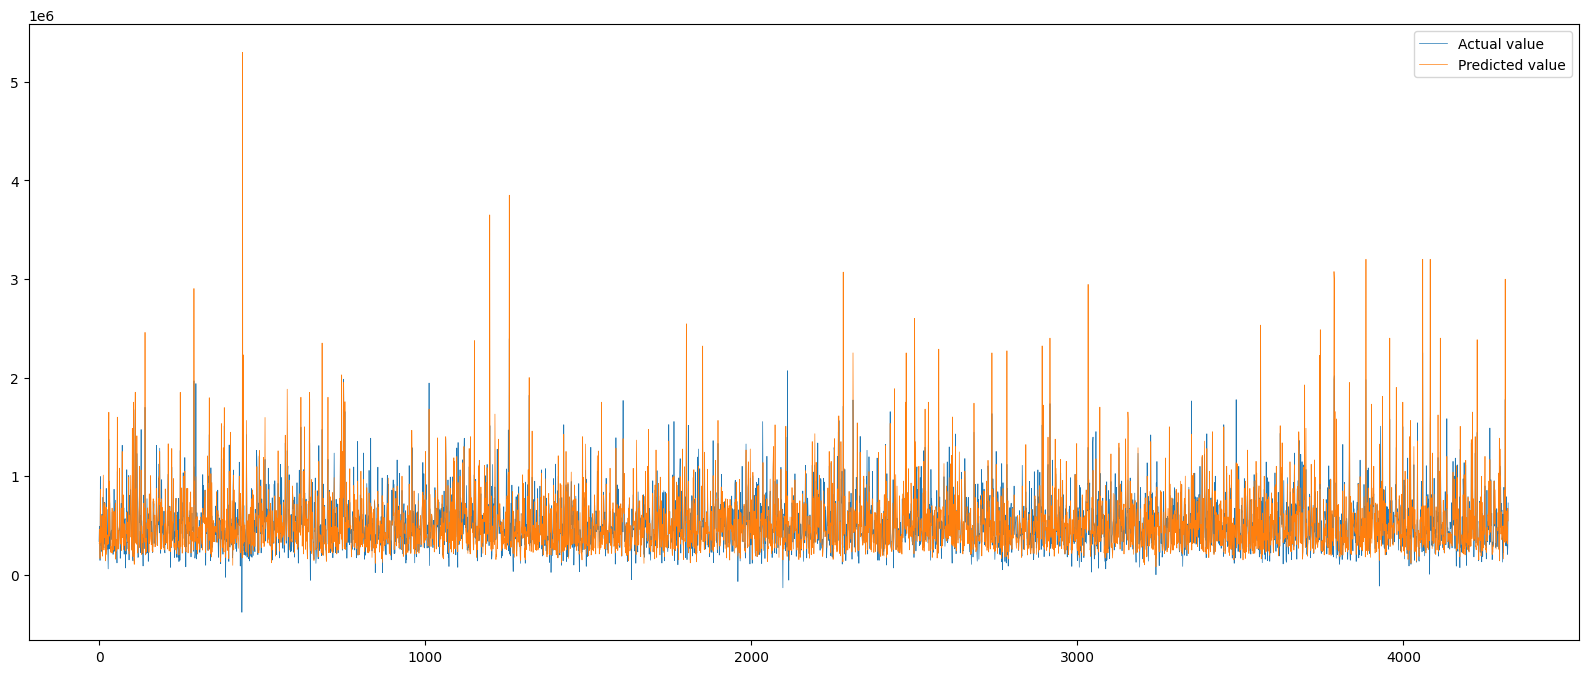

FOLD 5:
MAPE:  0.2962265531025201


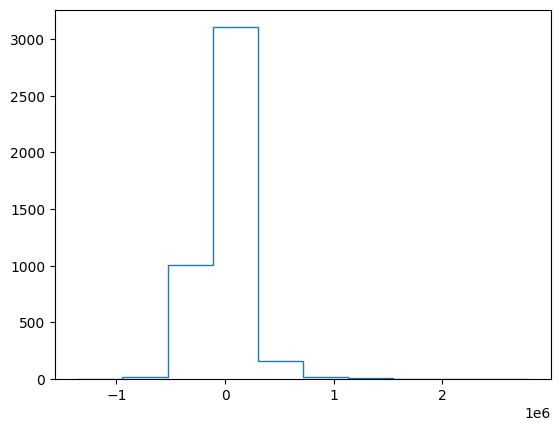

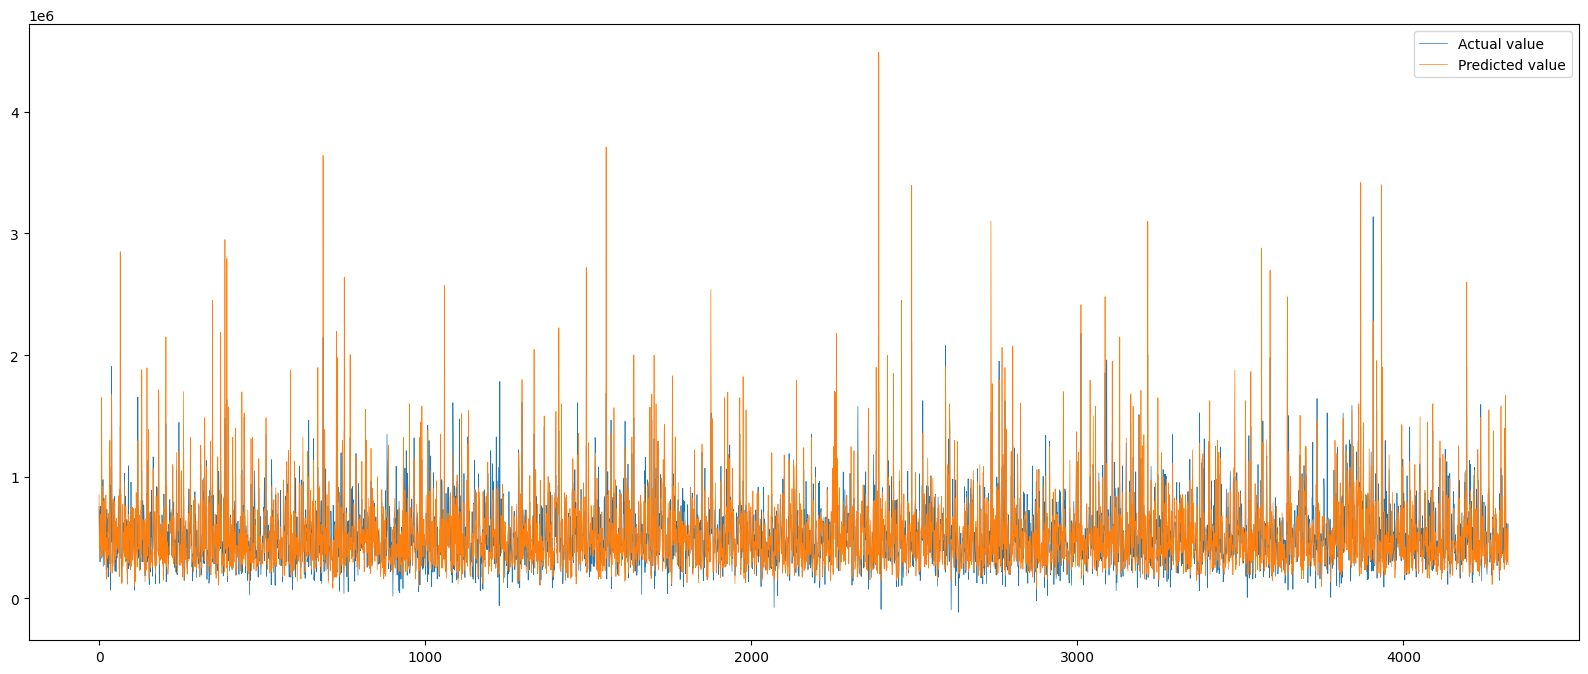

In [13]:
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
import torch

regr = linear_model.LinearRegression()

for i in range(5):
  print(f"FOLD {i+1}:")
  for j in range(5):
    if j != i:
      x_train = train[j]
      y_train = label_train[j]
      for k in range (5):
        if k != i and k != j:
          x_train = np.append(x_train, train[k], axis=0)
          y_train = np.append(y_train, label_train[k], axis=0)
      break
  regr.fit(x_train, y_train)
  mlp = regr.fit(x_train, y_train)
  regr_predicao = regr.predict(train[i])
  torch.save(mlp, f"/content/drive/MyDrive/RAFAEL_YAN_RNA_FOLD_{i+1}.pth")
  if i == 0:
    min_mape = metrics.mean_absolute_percentage_error(label_train[0],regr_predicao)
    min_mape_index = 0
  if metrics.mean_absolute_percentage_error(label_train[i],regr_predicao) < min_mape:
      min_mape = metrics.mean_absolute_percentage_error(label_train[i],regr_predicao)
      min_mape_index = i
  print(f"MAPE: ",metrics.mean_absolute_percentage_error(label_train[i],regr_predicao))
  abs = label_train[i] - regr_predicao
  sort_h = np.sort(regr_predicao)
  sort_f = np.sort(label_train[i])
  counts, bins = np.histogram(abs)
  plt.stairs(counts, bins)
  dt_outcomes = pd.DataFrame({'Predicted value':regr_predicao, 'Actual value':label_train[i]})
  fig= plt.figure(figsize=(20,8))
  dt_outcomes = dt_outcomes.reset_index()
  dt_outcomes = dt_outcomes.drop(['index'],axis=1)
  plt.plot(dt_outcomes[:4322], linewidth = 0.5)
  plt.legend(['Actual value','Predicted value'])
  plt.show()

In [14]:
best_mlp = torch.load(f"/content/drive/MyDrive/RAFAEL_YAN_RNA_FOLD_{min_mape_index + 1}.pth")

In [15]:
new_price = regr.predict(data2[:,1:17])

In [16]:
new_price = np.ndarray.tolist(new_price)

In [17]:
new_data["new_price"] = new_price

In [18]:
new_data = new_data.sample(frac=1, random_state=42)
new_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,new_price
4984,1443550020,20150506T000000,570000.0,4,2.50,2640,11816,2.0,0,0,...,2640.0,0,1999,0,98019,47.7330,-121.968,2400,11816,599951.479497
10256,510003230,20140810T000000,720001.0,3,2.50,1430,2200,1.5,0,0,...,1430.0,0,1910,0,98103,47.6601,-122.331,1740,4275,283045.824148
4046,2420069201,20141107T000000,267000.0,3,2.00,1390,6005,2.0,0,0,...,1390.0,0,2005,0,98022,47.2117,-121.990,1264,5550,369667.167761
21271,1773100924,20140708T000000,320000.0,3,3.25,1450,1387,2.0,0,0,...,1180.0,270,2013,0,98106,47.5556,-122.362,1450,1198,865732.568097
10496,3085001610,20140930T000000,397000.0,4,1.75,2020,6000,1.0,0,0,...,1620.0,400,1959,0,98144,47.5770,-122.302,1870,4000,372694.596233


In [22]:
import folium

map = folium.Map(location=[47.608013, -122.335167], zoom_start=10)

for i in range(1000):
  html = """<b><i>Price: </i></b>U${:.2f}<br>
        <b><i>Bedrooms: </i></b>{}<br>
        <b><i>Bathrooms: </i></b>{}<br>
        <b><i>Living Area: </i></b>{}ft2<br>
        <b><i>Lot_Area: </i></b>{}ft2<br>
        <b><i>Floors: </i></b>{}<br>
        <b><i>Waterfront: </i></b>{}<br>
        <b><i>View: </i></b>{}<br>
        <b><i>Condition: </i></b>{}<br>
        <b><i>Grade: </i></b>{}<br>
        <b><i>Above: </i></b>{}ft2<br>
        <b><i>Basement: </i></b>{}ft2<br>
        <b><i>Year_Built: </i></b>{}<br>
        <b><i>Year_Renovated :</i></b>{}<br>
        <b><i>Zipcode: </i></b>{}<br>
        <b><i>NEW PRICE: </i></b>{:.2f}</br>""".format(new_data.iloc[i]['id'],
                                                   new_data.iloc[i]['bedrooms'],
                                                   new_data.iloc[i]['bathrooms'],
                                                   new_data.iloc[i]['sqft_living'],
                                                   new_data.iloc[i]['sqft_lot'],
                                                   new_data.iloc[i]['floors'],
                                                   new_data.iloc[i]['waterfront'],
                                                   new_data.iloc[i]['view'],
                                                   new_data.iloc[i]['condition'],
                                                   new_data.iloc[i]['grade'],
                                                   new_data.iloc[i]['sqft_above'],
                                                   new_data.iloc[i]['sqft_basement'],
                                                   new_data.iloc[i]['yr_built'],
                                                   new_data.iloc[i]['yr_renovated'],
                                                   new_data.iloc[i]['zipcode'],
                                                   new_data.iloc[i]['new_price'])
  iframe = folium.IFrame(html, width=240, height=310)
  folium.Marker(
      location=[new_data.iloc[i]['lat'], new_data.iloc[i]['long']],
      popup=folium.Popup(iframe), tooltip=f"<b><i>ID: </i></b>{new_data.iloc[i]['id']}", icon = folium.Icon(prefix='fa', icon='house')).add_to(map)
map